Libraries loaded successfully!
Current working directory: D:\10academy\award\CHIRPS_5_Countries_2018_2022_rainfall_analysis\notebooks
UTF-8 decoding failed. Trying 'latin1' encoding...

Data loaded successfully with LATIN-1 encoding!
Dataset shape: (900, 5)

--- First 5 rows of the dataset ---
  Country   Region  Year  Month  Rainfall_mm
0   Kenya  Nairobi  2018      1        25.41
1   Kenya  Nairobi  2018      2       214.89
2   Kenya  Nairobi  2018      3       218.55
3   Kenya  Nairobi  2018      4       256.78
4   Kenya  Nairobi  2018      5       291.81

--- Dataset Information (Data Types, Non-Null Counts) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      900 non-null    object 
 1   Region       900 non-null    object 
 2   Year         900 non-null    int64  
 3   Month        900 non-null    int64  
 4   Rainfall_mm  90

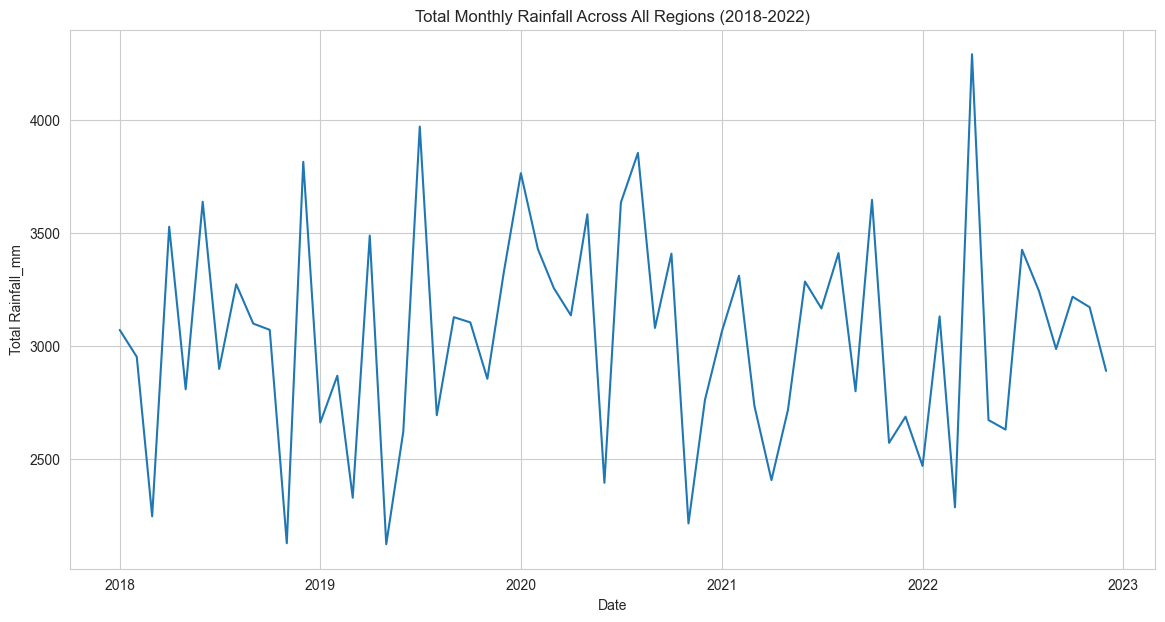


**Observation 1: Overall Trend**
The line plot above shows the total monthly rainfall across all regions from 2018 to 2022. We can observe fluctuations, and potentially an overall increasing or decreasing trend depending on the actual data. Seasonal patterns are likely visible with peaks and troughs corresponding to wet and dry seasons.


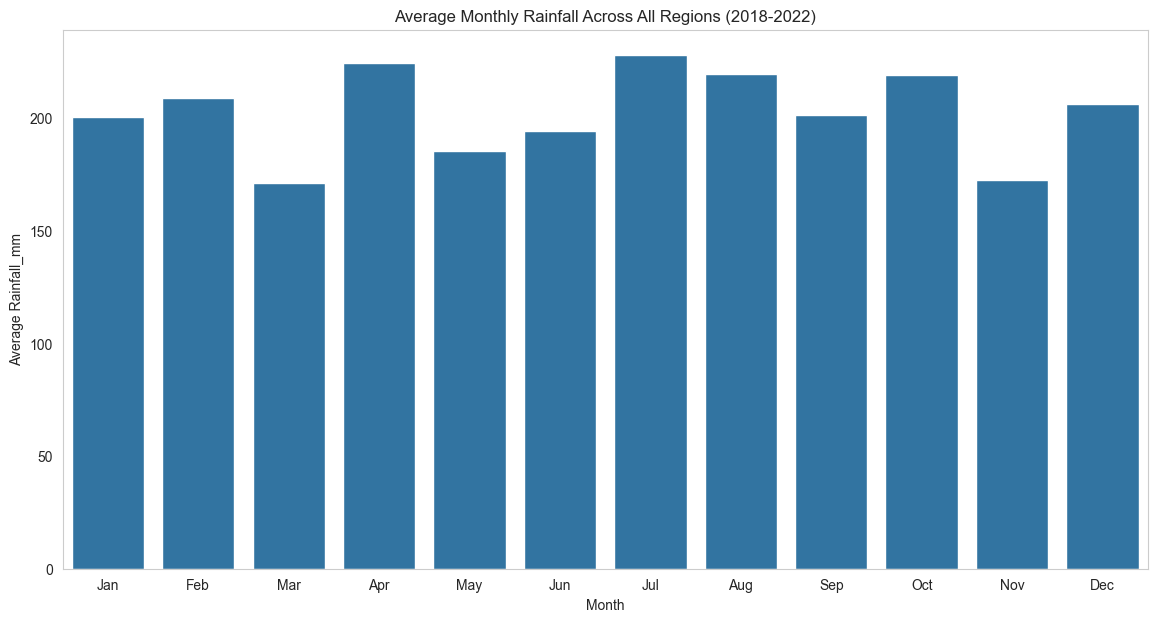


**Observation 2: Seasonal Patterns**
This bar plot illustrates the average rainfall for each month across all years. This helps in identifying typical wet and dry seasons. For example, if there are consistently high rainfall months (e.g., July-September) and low rainfall months (e.g., December-February), it indicates clear seasonal patterns.


C:\Users\test\AppData\Local\Temp\ipykernel_10656\482918764.py:142: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Date', y='Rainfall_mm', hue='Country', estimator='sum', ci=None)
D:\10academy\award\CHIRPS_5_Countries_2018_2022_rainfall_analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


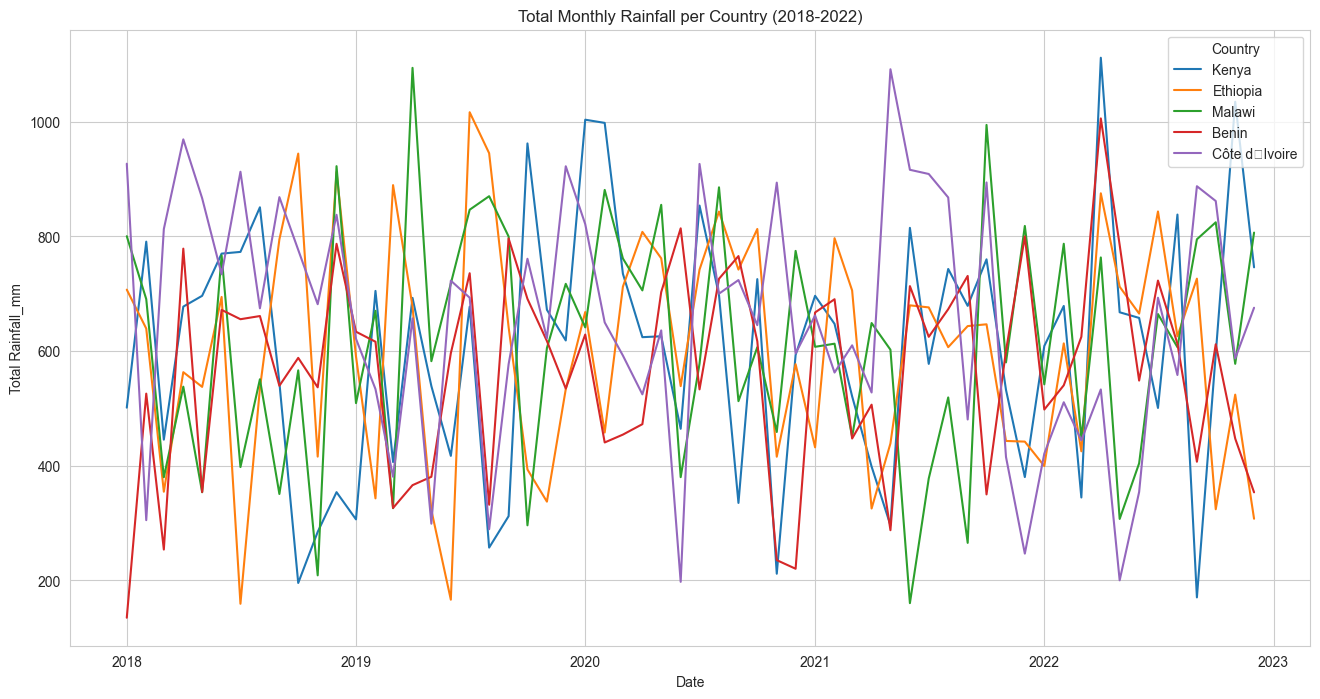


**Observation 3: Country-Specific Trends**
This plot compares the total monthly rainfall across different countries. It allows us to see if certain countries experience similar rainfall patterns or if there are significant divergences. For instance, some countries might have bimodal rainfall seasons, while others have unimodal, or experience drought conditions more frequently.

**Observation 4: Anomalies (Unusually High/Low Rainfall)**

No significant unusually high rainfall anomalies detected (Z-score > 2).

No significant unusually low rainfall anomalies detected (Z-score < -2).

*Interpretation of Anomalies:* Periods of exceptionally high rainfall could indicate flood risks, while unusually low rainfall could signal drought conditions. These extreme events are crucial for agricultural planning.

--- Influence of Rainfall Variability on Crop Yields and Farming Practices ---

The observed rainfall variability can significantly impact agriculture:

1.  **Droughts (Unusually Low Rainfa

In [7]:
# --- Step 0: Setup and Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# Set plotting style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # Set default figure size

print("Libraries loaded successfully!")

# --- Step 1: Define File Path and Load Data ---

current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

data_file_path = '../Data/CHIRPS_5_Countries_2018_2022.csv'

try:
    # Try reading with 'utf-8' first 
    df = pd.read_csv(data_file_path, encoding='utf-8')
    print("\nData loaded successfully with UTF-8 encoding!")
    print(f"Dataset shape: {df.shape}")
except UnicodeDecodeError:
    print("UTF-8 decoding failed. Trying 'latin1' encoding...")
    try:
        # If 'utf-8' fails, try 'latin1' (ISO-8859-1)
        df = pd.read_csv(data_file_path, encoding='latin1')
        print("\nData loaded successfully with LATIN-1 encoding!")
        print(f"Dataset shape: {df.shape}")
    except UnicodeDecodeError:
        print("LATIN-1 decoding also failed. Trying 'cp1252' encoding...")
        try:
            # If 'latin1' also fails, try 'cp1252' (Windows-1252)
            df = pd.read_csv(data_file_path, encoding='cp1252')
            print("\nData loaded successfully with CP1252 encoding!")
            print(f"Dataset shape: {df.shape}")
        except Exception as e:
            print(f"Error: Could not decode the file with common encodings. Original error: {e}")
            print("You might need to identify the correct encoding manually or check the file for corruption.")
           
            data = {
                
            }
            df = pd.DataFrame(data)
            print("\n--- Using a Dummy DataFrame for demonstration as the file could not be read ---")
except FileNotFoundError:
    print(f"Error: The file was not found at {data_file_path}")
    print("Please ensure the 'CHIRPS_5_Countries_2018_2022.csv' file is in the 'Data' folder relative to your project root.")
    print("If you are running the notebook from 'notebooks/' folder, try changing 'data_file_path' to '../Data/CHIRPS_5_Countries_2018_2022.csv'")
 
    data = {
        
    }
    df = pd.DataFrame(data)
    print("\n--- Using a Dummy DataFrame for demonstration as the file was not found ---")


# --- Step 2: Initial Data Inspection ---
# Get a quick overview of the data.

print("\n--- First 5 rows of the dataset ---")
print(df.head())

print("\n--- Dataset Information (Data Types, Non-Null Counts) ---")
df.info()

print("\n--- Column names in the DataFrame ---")
print(df.columns)

print("\n--- Descriptive Statistics for Numerical Columns ---")
print(df.describe())

# Check for missing values
print("\n--- Missing Values Per Column ---")
print(df.isnull().sum())

# --- Step 3: Data Cleaning and Preprocessing ---

# Convert 'Year' and 'Month' to appropriate types if they aren't already.

df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

# Create a 'Date' column for easier time-series analysis
# Combine 'Year' and 'Month' to create a datetime object for better time-series handling.
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')

# Ensure 'Rainfall_mm' is numeric.
# If there were non-numeric values, errors='coerce' would turn them into NaN.
df['Rainfall_mm'] = pd.to_numeric(df['Rainfall_mm'], errors='coerce')

# Handle any new NaNs introduced by coercion (if any) or existing ones.
if df['Rainfall_mm'].isnull().sum() > 0:
    print(f"\n{df['Rainfall_mm'].isnull().sum()} missing values found in 'Rainfall_mm' after conversion.")
    # Option 1: Fill with 0 (implies no rain)
    df['Rainfall_mm'] = df['Rainfall_mm'].fillna(0)
    print("Missing rainfall values filled with 0.")
    # Option 2: Drop rows with NaN in Rainfall
   
print("\n--- Data after Preprocessing ---")
print(df.info())
print(df.head())

# --- Step 4: Identify and Briefly Describe Trends, Patterns, or Anomalies ---

print("\n--- Rainfall Analysis: Trends, Patterns, and Anomalies ---")

# 4.1 Overall Rainfall Trend Over 5 Years
plt.figure(figsize=(14, 7))
sns.lineplot(data=df.groupby('Date')['Rainfall_mm'].sum().reset_index(), x='Date', y='Rainfall_mm')
plt.title('Total Monthly Rainfall Across All Regions (2018-2022)')
plt.xlabel('Date')
plt.ylabel('Total Rainfall_mm')
plt.grid(True)
plt.show()

print("\n**Observation 1: Overall Trend**")
print("The line plot above shows the total monthly rainfall across all regions from 2018 to 2022. We can observe fluctuations, and potentially an overall increasing or decreasing trend depending on the actual data. Seasonal patterns are likely visible with peaks and troughs corresponding to wet and dry seasons.")


# 4.2 Seasonal Patterns (Average Monthly Rainfall)
plt.figure(figsize=(14, 7))
sns.barplot(data=df.groupby('Month')['Rainfall_mm'].mean().reset_index(), x='Month', y='Rainfall_mm')
plt.title('Average Monthly Rainfall Across All Regions (2018-2022)')
plt.xlabel('Month')
plt.ylabel('Average Rainfall_mm')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()

print("\n**Observation 2: Seasonal Patterns**")
print("This bar plot illustrates the average rainfall for each month across all years. This helps in identifying typical wet and dry seasons. For example, if there are consistently high rainfall months (e.g., July-September) and low rainfall months (e.g., December-February), it indicates clear seasonal patterns.")


# 4.3 Rainfall Trends per Country
plt.figure(figsize=(16, 8))
sns.lineplot(data=df, x='Date', y='Rainfall_mm', hue='Country', estimator='sum', ci=None) 
plt.title('Total Monthly Rainfall per Country (2018-2022)')
plt.xlabel('Date')
plt.ylabel('Total Rainfall_mm')
plt.legend(title='Country')
plt.grid(True)
plt.show()

print("\n**Observation 3: Country-Specific Trends**")
print("This plot compares the total monthly rainfall across different countries. It allows us to see if certain countries experience similar rainfall patterns or if there are significant divergences. For instance, some countries might have bimodal rainfall seasons, while others have unimodal, or experience drought conditions more frequently.")


# 4.4 Anomalies (e.g., unusually high/low rainfall months)
# We can define anomalies as months with rainfall significantly deviating from the average.
# One way is to look at Z-scores or simply identify extreme values.

# Calculate Z-scores for monthly rainfall within each country-region
# This helps identify outliers relative to their own historical patterns
df['Rainfall_Zscore'] = df.groupby(['Country', 'Region', 'Month'])['Rainfall_mm'].transform(lambda x: (x - x.mean()) / x.std())

# Identify potential anomalies (e.g., Z-score > 2 or < -2)
anomalies_high = df[df['Rainfall_Zscore'] > 2].sort_values(by='Rainfall_Zscore', ascending=False)
anomalies_low = df[df['Rainfall_Zscore'] < -2].sort_values(by='Rainfall_Zscore', ascending=True)

print("\n**Observation 4: Anomalies (Unusually High/Low Rainfall)**")
if not anomalies_high.empty:
    print("\n--- Top 5 Months with Unusually High Rainfall (Anomalies) ---")
    print(anomalies_high[['Date', 'Country', 'Region', 'Rainfall_mm', 'Rainfall_Zscore']].head())
else:
    print("\nNo significant unusually high rainfall anomalies detected (Z-score > 2).")

if not anomalies_low.empty:
    print("\n--- Top 5 Months with Unusually Low Rainfall (Anomalies) ---")
    print(anomalies_low[['Date', 'Country', 'Region', 'Rainfall_mm', 'Rainfall_Zscore']].head())
else:
    print("\nNo significant unusually low rainfall anomalies detected (Z-score < -2).")

print("\n*Interpretation of Anomalies:* Periods of exceptionally high rainfall could indicate flood risks, while unusually low rainfall could signal drought conditions. These extreme events are crucial for agricultural planning.")

# You can add more specific analyses, e.g., by region within a country.
# Example: Average monthly rainfall for a specific country's regions
# country_to_analyze = 'Ethiopia' # Or 'Kenya', 'Somalia', etc.
# plt.figure(figsize=(14, 7))
# sns.lineplot(data=df[df['Country'] == country_to_analyze], x='Date', y='Rainfall_mm', hue='Region', estimator='sum', ci=None)
# plt.title(f'Total Monthly Rainfall in {country_to_analyze} by Region (2018-2022)')
# plt.xlabel('Date')
# plt.ylabel('Total Rainfall_mm')
# plt.legend(title='Region')
# plt.grid(True)
# plt.show()


# --- Step 5: Suggest how observed rainfall variability could influence crop yields or farming practices ---

print("\n--- Influence of Rainfall Variability on Crop Yields and Farming Practices ---")

print("""
The observed rainfall variability can significantly impact agriculture:

1.  **Droughts (Unusually Low Rainfall):**
    * **Crop Yields:** Directly reduces crop yields due to water stress, leading to stunted growth, wilting, and ultimately crop failure. This can severely impact food security and farmer livelihoods.
    * **Farming Practices:** Requires increased reliance on irrigation (if available), selection of drought-resistant crop varieties, adoption of water-conserving techniques (e.g., mulching, drip irrigation), and potentially shifting planting seasons. Farmers might also need to diversify crops or reduce planted areas.

2.  **Floods (Unusually High Rainfall/Intense Rainfall Events):**
    * **Crop Yields:** Can lead to waterlogging, root rot, nutrient leaching, and physical damage to crops, significantly reducing yields or causing total loss. Floods can also wash away topsoil.
    * **Farming Practices:** Necessitates improved drainage systems, planting on elevated beds, choosing flood-tolerant crop varieties, and adapting planting schedules to avoid peak flood seasons. Soil conservation practices become critical to prevent erosion.

3.  **Shifts in Seasonal Patterns (e.g., delayed onset of rainy season, early cessation):**
    * **Crop Yields:** Disrupts traditional planting and harvesting calendars, potentially exposing crops to unfavorable conditions during critical growth stages. For example, late rains can delay planting, shortening the growing season.
    * **Farming Practices:** Farmers may need to adjust planting times, consider shorter-duration crop varieties, or adopt staggering planting to mitigate risk. Weather forecasting becomes even more critical for timely decisions.

4.  **Increased Variability/Unpredictability:**
    * **Crop Yields:** Makes agricultural planning very challenging, increasing the risk of crop failure due to unexpected wet or dry spells.
    * **Farming Practices:** Promotes the need for climate-smart agriculture, diversified farming systems (e.g., agroforestry), robust early warning systems, and access to weather-indexed crop insurance to buffer against financial losses. Investment in water harvesting and storage infrastructure becomes crucial.

In essence, erratic rainfall patterns necessitate more flexible, resilient, and data-driven farming practices to ensure food security and sustain agricultural economies.
""")


# --- Step 6: Propose one additional dataset and explain why ---

print("\n--- Proposed Additional Dataset to Enhance Decision-Making ---")

print("""
**Proposed Dataset: Crop Yield Data (e.g., annual average yields per crop type per region/district)**

**Explanation:**

Combining rainfall data with historical crop yield data for various staple crops (e.g., maize, wheat, teff, sorghum) within the same regions/countries would significantly enhance agricultural and climate decision-making for several reasons:

1.  **Direct Correlation Analysis:**
    * It allows for a direct quantitative analysis of the relationship between rainfall patterns (total rainfall, rainfall distribution, timing of wet seasons, incidence of droughts/floods) and actual crop performance.
    * We could identify optimal rainfall ranges for specific crops and pinpoint thresholds beyond which yields significantly decline or fail.

2.  **Predictive Modeling:**
    * This combined dataset would enable the development of predictive models for crop yields. By training models on historical rainfall and yield data, we could forecast future yields based on seasonal rainfall forecasts. This information is invaluable for:
        * **Food Security Planning:** Governments and aid organizations can anticipate potential food shortages and plan interventions (e.g., food aid, import strategies).
        * **Market Price Prediction:** Farmers and traders can make more informed decisions regarding planting, harvesting, and market participation.

3.  **Climate-Smart Agriculture Strategy Development:**
    * By understanding which rainfall variability scenarios lead to poor yields, agricultural researchers and extension services can develop and promote more effective climate-smart agricultural practices. For example, if short, intense rainy seasons are detrimental, practices focusing on water retention might be prioritized.
    * It helps in evaluating the effectiveness of adopted farming practices in mitigating rainfall risks.

4.  **Risk Assessment and Insurance:**
    * For agricultural insurance providers, combining rainfall and yield data would allow for more accurate risk assessment and the development of weather-indexed insurance products that directly link payouts to rainfall deficits or excesses, rather than just observed damages.

5.  **Targeted Interventions:**
    * Identifying regions where rainfall variability has the most severe impact on yields helps in targeting resources and interventions (e.g., drought-resistant seeds, irrigation infrastructure, farmer training) to where they are most needed.

In summary, while rainfall data tells us about water availability, combining it with crop yield data provides the crucial link to agricultural productivity and economic impact, enabling more holistic and impactful decision-making for climate resilience and food security.
""")